Data visualization on electricity production by source

In [1]:
# Setting and import
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# Data import
database = pd.read_csv(r"C:\Users\39340\Desktop\Data-Visualization\Electricity production\dati\electricity_production_data.csv")

In [3]:
database.head(10)

"""
Descrizione del dataset:
Keys for columns:
    Entity - name of country or territory and the world (total for all countries);
    Code - the ISO country codes;
    Year - years from 1965 to 2023;

The amount of electricity produced per year (measured in terawatt-hours) by sources:
    Coal;
    Gas;
    Nuclear;
    Hydro;
    Solar;
    Oil;
    Wind;
    Bioenergy;
    Other renewables (include waste, geothermal and wave and tidal energy).
"""

'\nDescrizione del dataset:\nKeys for columns:\n    Entity - name of country or territory and the world (total for all countries);\n    Code - the ISO country codes;\n    Year - years from 1965 to 2023;\n\nThe amount of electricity produced per year (measured in terawatt-hours) by sources:\n    Coal;\n    Gas;\n    Nuclear;\n    Hydro;\n    Solar;\n    Oil;\n    Wind;\n    Bioenergy;\n    Other renewables (include waste, geothermal and wave and tidal energy).\n'

In [4]:
# Dimensioni del dataset
print(f"Il dataset contiene {database.shape[0]} righe e {database.shape[1]} colonne.") # Il dataset contiene 8263 righe e 12 colonne.

Il dataset contiene 8263 righe e 12 colonne.


In [5]:
# Approfondiamo la natura delle colonne del dataset
database.info()

database.columns # 'Entity', 'Code', 'Year', 'Coal', 'Gas', 'Nuclear', 'Hydro', 'Solar', 'Oil', 'Wind', 'Bioenergy', 'Other renewables'

colonne = {}
for i in database.columns:
    colonna = []
    colonna.append(i)
    colonna.append(len(database[i]) - database[i].isnull().sum())
    colonna.append(database[i].dtypes)
    colonna.append(database[i].nunique())
    colonna.append(database[i].isnull().sum())
    colonne[i] = colonna

colonne = pd.DataFrame.from_dict(colonne).T
colonne.columns = ["Name", "Dati", "Type", "Unique value", "Null value"]
colonne.drop("Name", axis = 1, inplace = True)

colonne

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8263 entries, 0 to 8262
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entity            8263 non-null   object 
 1   Code              8263 non-null   object 
 2   Year              8263 non-null   int64  
 3   Coal              5692 non-null   float64
 4   Gas               5626 non-null   float64
 5   Nuclear           8156 non-null   float64
 6   Hydro             7462 non-null   float64
 7   Solar             6668 non-null   float64
 8   Oil               5736 non-null   float64
 9   Wind              6697 non-null   float64
 10  Bioenergy         5317 non-null   float64
 11  Other renewables  4753 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 774.8+ KB


,Dati,Type,Unique value,Null value
Entity,8263,object,219,0
Code,8263,object,219,0
Year,8263,int64,59,0
Coal,5692,float64,1923,2571
Gas,5626,float64,2269,2637
Nuclear,8156,float64,1498,107
Hydro,7462,float64,3472,801
Solar,6668,float64,553,1595
Oil,5736,float64,1744,2527
Wind,6697,float64,811,1566


In [6]:
# Import specific package
import geopandas
import geopandas.tools
import geopy
!pip install geopy
!pip install geodatasets

In [7]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world_b = world[["iso_a3", "geometry"]]

world_b

C:\Users\39340\AppData\Local\Temp\ipykernel_23688\897700161.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


,iso_a3,geometry
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...
172,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,-99,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [8]:
database = database.merge(right = world_b, left_on = database["Code"], right_on = world_b["iso_a3"])
database.drop("iso_a3", axis = 1, inplace = True)
database

,key_0,Entity,Code,Year,Coal,Gas,Nuclear,Hydro,Solar,Oil,Wind,Bioenergy,Other renewables,geometry
0,AFG,Afghanistan,AFG,2000,0.00,0.0,0.0,0.31,0.0,0.17,0.0,0.0,0.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
1,AFG,Afghanistan,AFG,2001,0.04,0.0,0.0,0.50,0.0,0.15,0.0,0.0,0.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
2,AFG,Afghanistan,AFG,2002,0.04,0.0,0.0,0.56,0.0,0.11,0.0,0.0,0.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
3,AFG,Afghanistan,AFG,2003,0.09,0.0,0.0,0.63,0.0,0.19,0.0,0.0,0.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
4,AFG,Afghanistan,AFG,2004,0.06,0.0,0.0,0.56,0.0,0.17,0.0,0.0,0.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7015,ZWE,Zimbabwe,ZWE,1996,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."
7016,ZWE,Zimbabwe,ZWE,1997,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."
7017,ZWE,Zimbabwe,ZWE,1998,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."
7018,ZWE,Zimbabwe,ZWE,1999,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."


In [9]:
database_2023 = database.loc[database["Year"] == 2023].reset_index()
database_2023 = geopandas.GeoDataFrame(database_2023, geometry = "geometry")

In [10]:
database_2023.columns

Index(['index', 'key_0', 'Entity', 'Code', 'Year', 'Coal', 'Gas', 'Nuclear',
       'Hydro', 'Solar', 'Oil', 'Wind', 'Bioenergy', 'Other renewables',
       'geometry'],
      dtype='object')

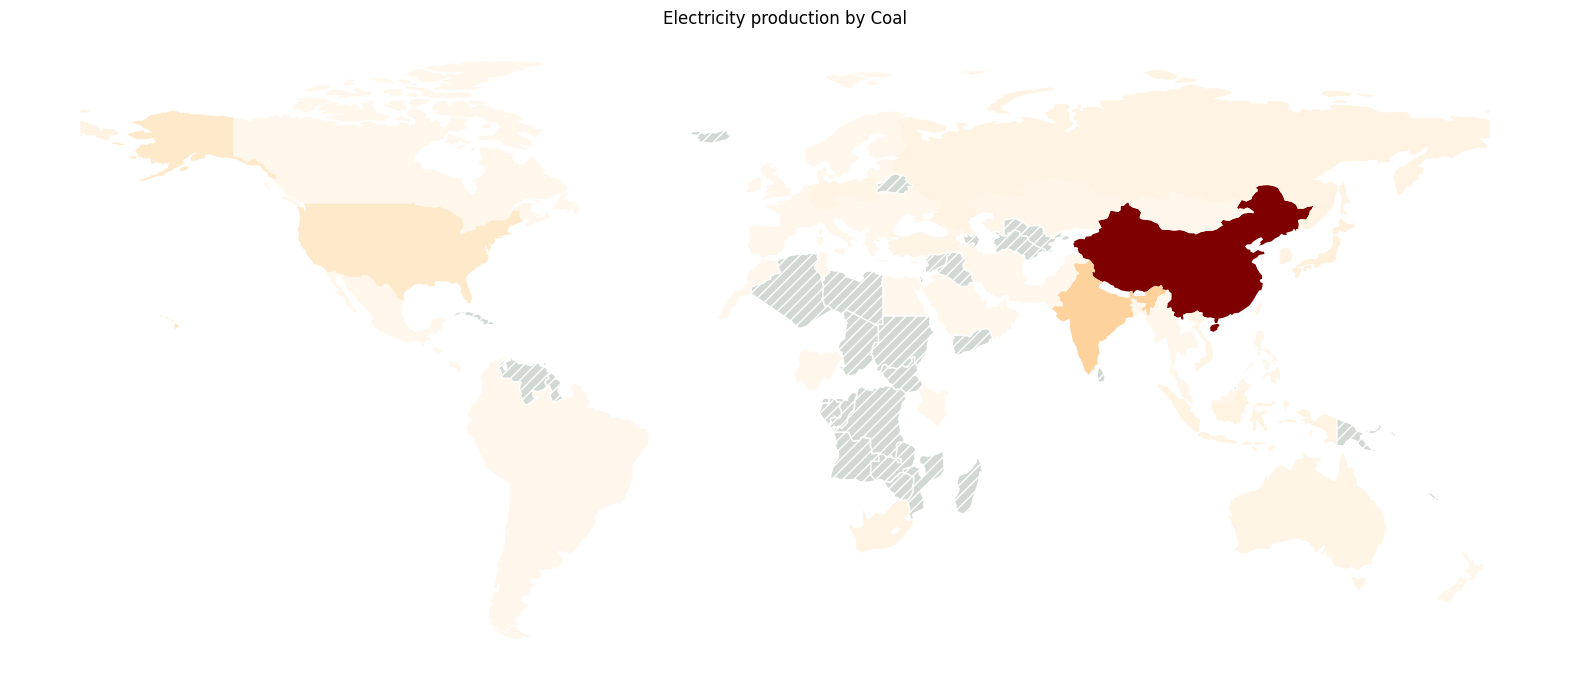

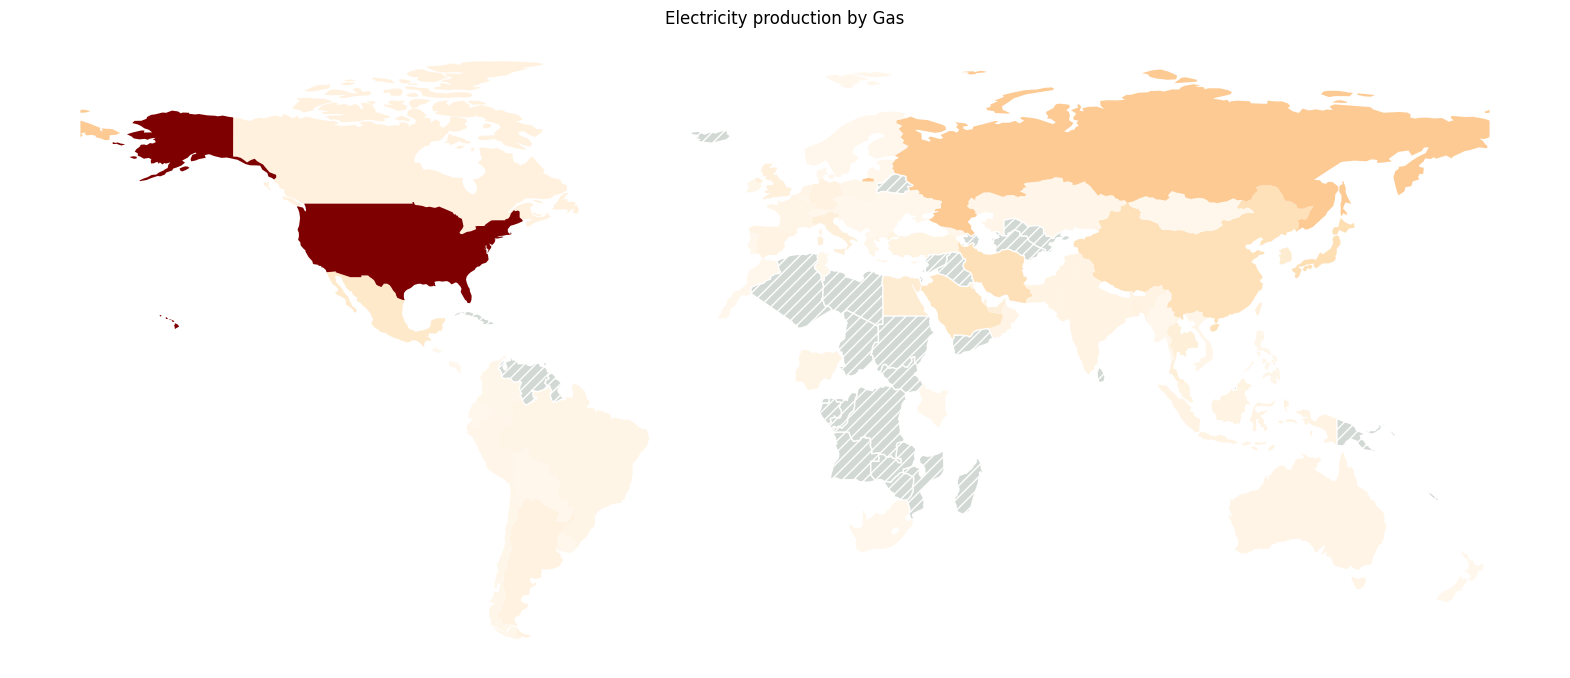

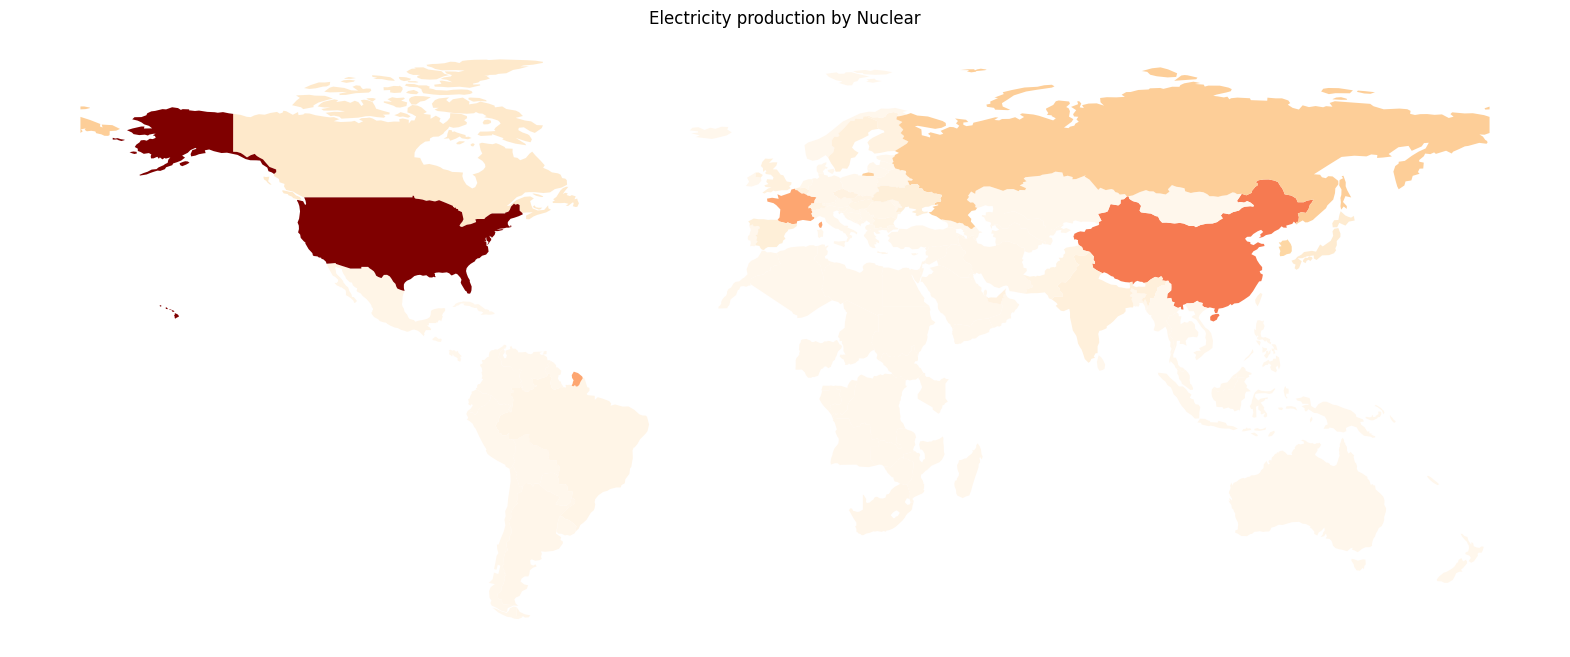

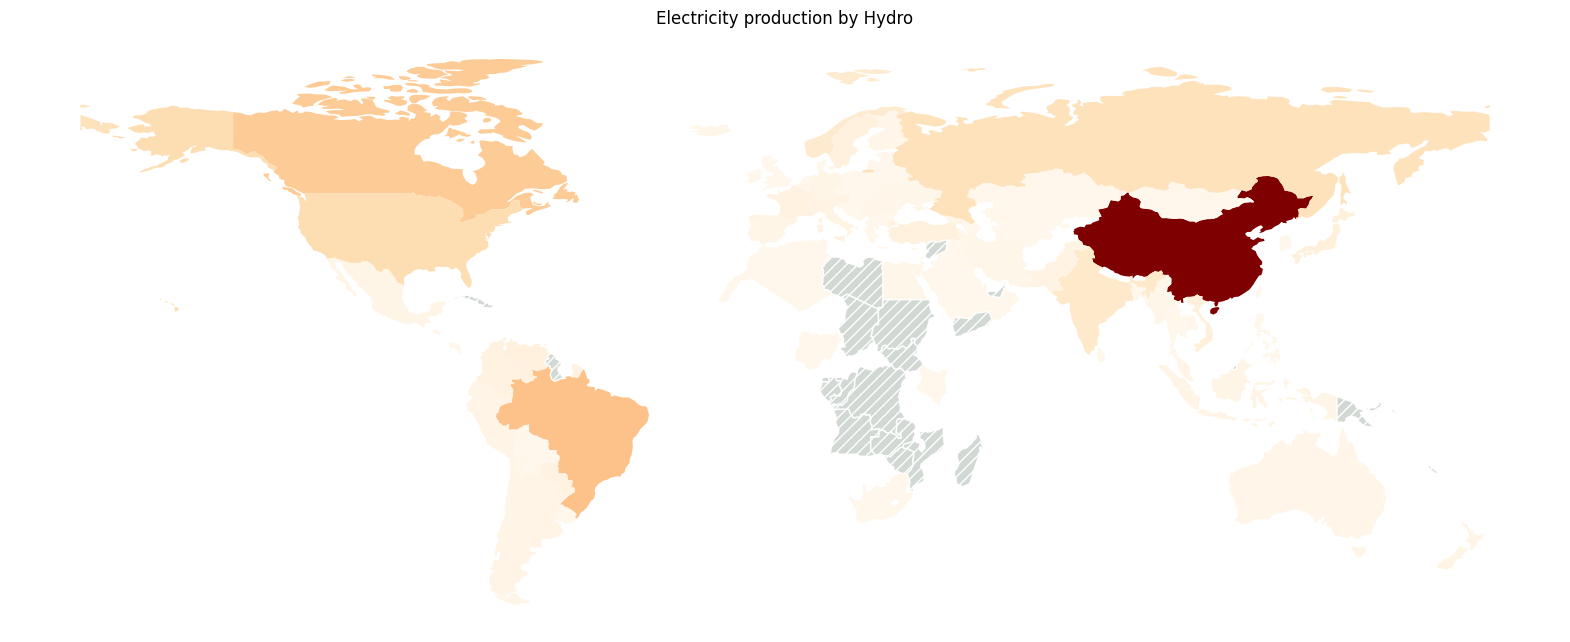

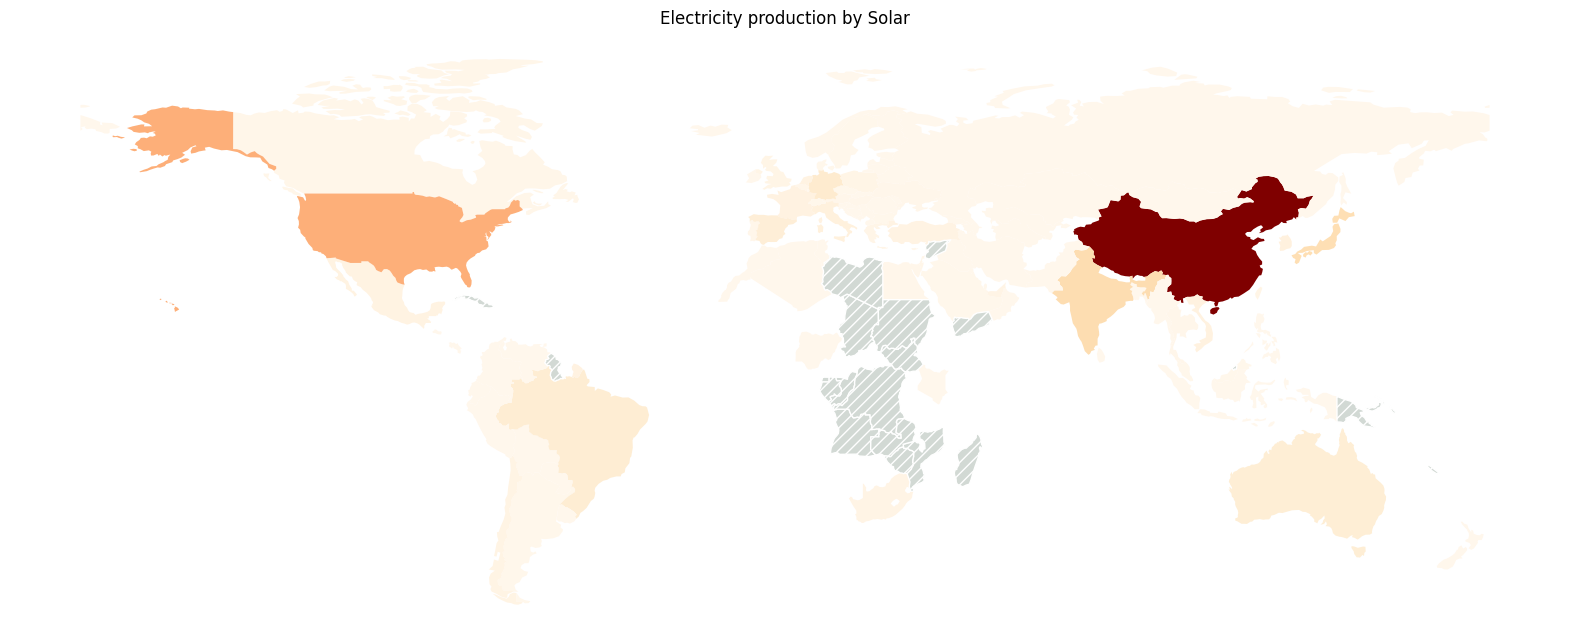

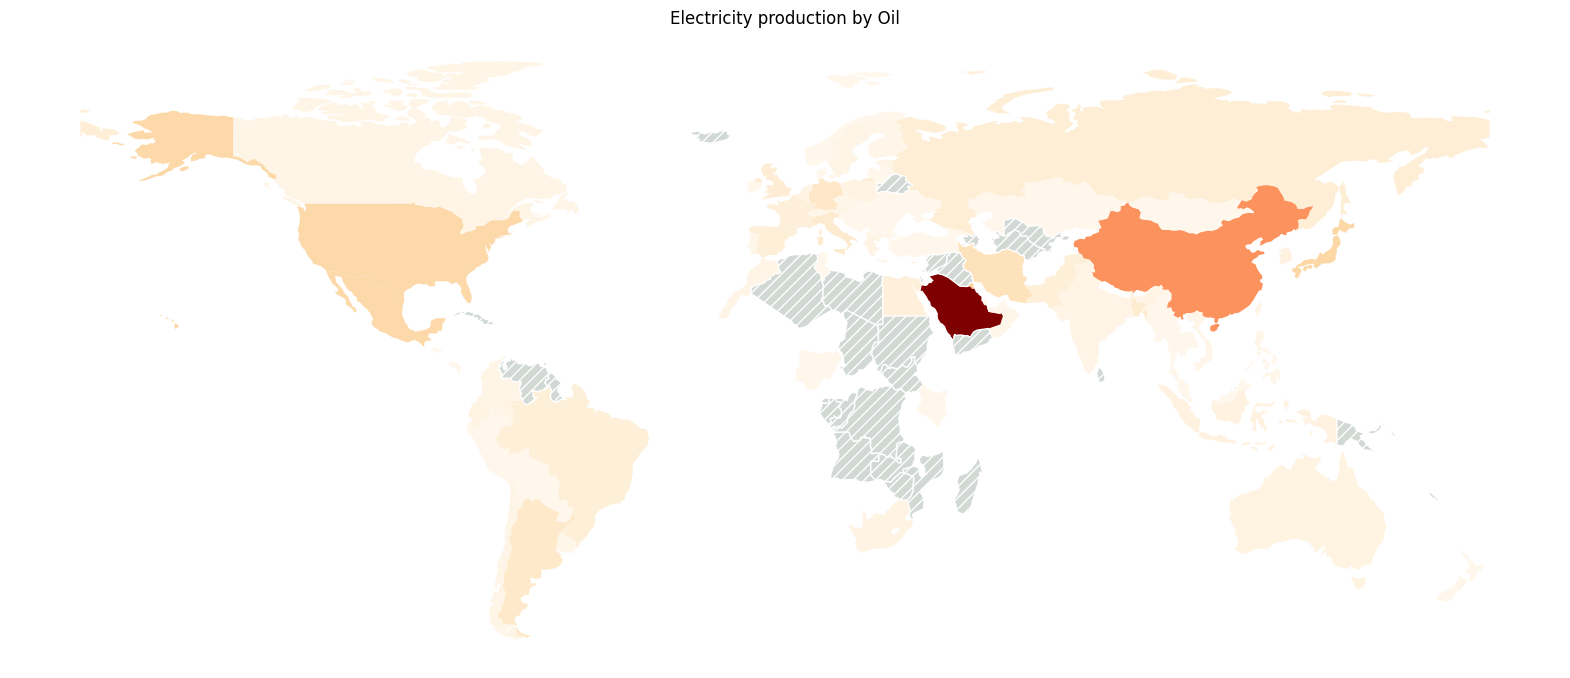

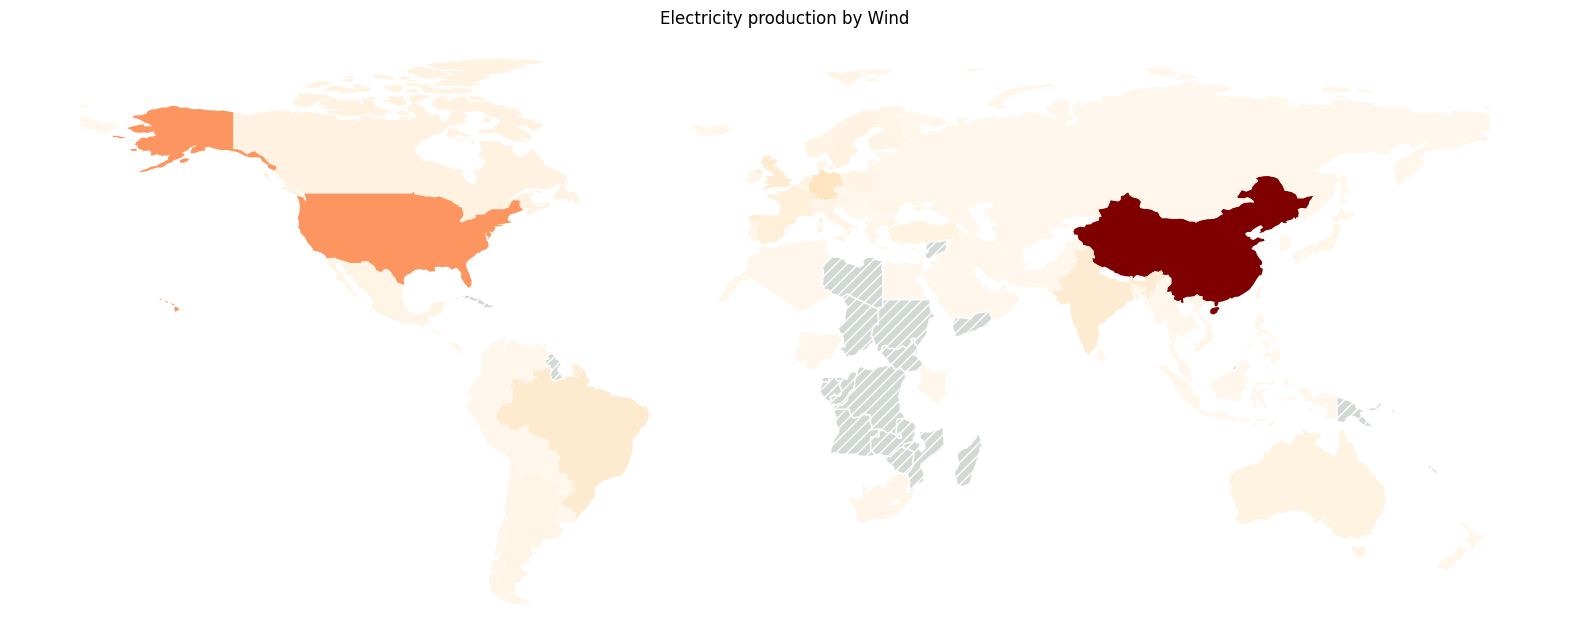

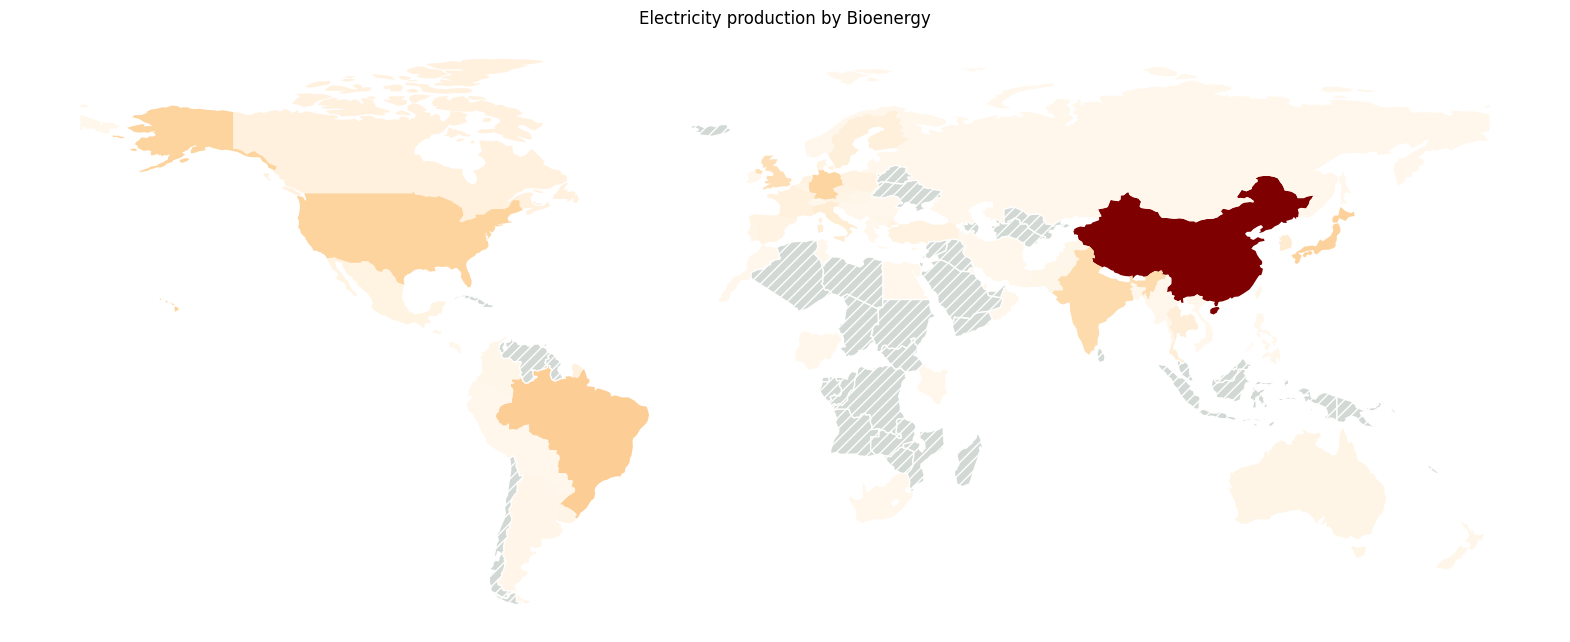

In [14]:
# !pip install mapclassify

for i in ['Coal', 'Gas', 'Nuclear','Hydro', 'Solar', 'Oil', 'Wind', 'Bioenergy']:
    ax = database_2023.plot(i, cmap = 'OrRd', figsize = (20, 15), missing_kwds = {"color": "#d2d9d4", "edgecolor": "white",
        "hatch": "///"})
    ax.set_axis_off()
    ax.set_title(f"Electricity production by {i}")